# Housekeeping notes

- for this I'm just going to pull values from other notebooks

# Setup code

In [2]:
# Import Packages
import Pkg

Pkg.add("Plots")
Pkg.add("LsqFit")
Pkg.add("DelimitedFiles")
Pkg.add("PlotlyJS")  # optional if you later want interactive plots
Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`


Style for plots

In [3]:
using Plots,DelimitedFiles,LsqFit,LaTeXStrings

include("src/PhotoPeakFit.jl");

default(framestyle=:box,
        mc=:black,
        grid=false,
        guidefont=14,
        tickfont=12,
        lc=:navy,
        xlabel="Eᵧ (internal)",
        ylabel="counts")

May or may not need these, adding them for consistency

In [4]:
kliterature = [564.79,
               586.01,
               2013.45]

3-element Vector{Float64}:
  564.79
  586.01
 2013.45

Efficiency Calibrations
- may or may not need this either, inlcuding for consistency

In [5]:
# Fit function is of the form 50^(p[1]+p[2]*log10(e)+p[3]*log10(e)^2)
io = open("calibrations/Eu152-efficiency-cal.csv", "r")
clover_eff_params = readdlm(io, ',', Float64, '\n', comments=true, comment_char='#')
close(io)

c0_eff_fit, c1_eff_fit, c2_eff_fit = clover_eff_params[1,:],clover_eff_params[2,:],clover_eff_params[3,:]

c0_eff_params,c1_eff_params,c2_eff_params = [c0_eff_fit[1],c0_eff_fit[3],c0_eff_fit[5]],
                                            [c1_eff_fit[1],c1_eff_fit[3],c1_eff_fit[5]],
                                            [c2_eff_fit[1],c2_eff_fit[3],c2_eff_fit[5]]

c0_σeff,c1_σeff,c2_σeff = [c0_eff_fit[2],c0_eff_fit[4],c0_eff_fit[6]], 
                          [c1_eff_fit[2],c1_eff_fit[4],c1_eff_fit[6]],
                          [c2_eff_fit[2],c2_eff_fit[4],c2_eff_fit[6]]

([0.04994475356378319, 0.03881764706440051, 0.0074349631904078745], [0.059208192080767955, 0.0466367978146129, 0.009090355673327628], [0.048188710602606065, 0.03712260347339793, 0.007054630479249403])

# Values from previous books

## K47_T1_001

In [6]:
# Clover 0 (N_0)
N_0_plus = [551112.459447147, 3.2015988389246287e6, 1.415436367300364e6]
N_0_σplus = [5093.306800184273, 29643.71840995894, 13254.733084601521]

# Clover 1 (N_1)
N_1_plus = [76156.0625946827, 435329.2792522732, 203994.8023015002]
N_1_σplus = [1370.7139462257294, 7199.422159068407, 2232.2697899070095]

# Clover 2 (N_2)
N_2_plus =  [603553.4687765208, 4.311935657026002e6, 1.8547849975897027e6]
N_2_σplus = [6188.211940066402, 26529.250721938202, 14249.526711352057]

3-element Vector{Float64}:
  6188.211940066402
 26529.250721938202
 14249.526711352057

## K47_T1_002

In [7]:
# Clover 0 (N_0)
N_0_minus = [1.7292393731881208e6, 9.88212108370103e6, 4.398562361741757e6]
N_0_σminus = [16050.629959403417, 93756.90047874278, 39184.186824577744]

# Clover 1 (N_1)
N_1_minus = [236566.33601433228, 1.3565204672148577e6, 634836.849390847]
N_1_σminus = [3961.9639426417566, 21960.829776956114, 6969.598277971881]

# Clover 2 (N_2)
N_2_minus = [1.8711658167610366e6, 1.331937993592412e7, 5.753199323518829e6]
N_2_σminus = [17701.44329916337, 97206.85129298695, 52292.721476740684]

3-element Vector{Float64}:
 17701.44329916337
 97206.85129298695
 52292.721476740684

# IS733 analysis report

In [8]:
R_fun(A, B, C, D) = (A .* D) ./ (B .* C)


err(A, B, C, D, σA, σB, σC, σD) = ((((σA) .^2) .* ((D ./ (B .* C)) .^ 2)) .+ (((σB) .^ 2) .* (((-A .* D) ./ ((B .^ 2) .* C)) .^ 2)) .+ (((σC) .^2) .* (((-A .* D) ./ (B .* (C .^ 2))) .^2)) .+ (((σD) .^ 2) .* ((A ./ (B .* C)) .^ 2))) .^ (0.5)

R = R_fun(N_0_plus, N_1_plus, N_0_minus, N_1_minus)
println(R)

error_r = err(N_0_plus, N_1_plus, N_0_minus, N_1_minus, N_0_σplus, N_1_σplus, N_0_σminus, N_1_σminus)
println(error_r)


[0.9899963090942512, 1.0095439160443338, 1.0014346681068445]
[0.027578271772194997, 0.02692533110808561, 0.02021125625605141]


In [17]:
AP = (((R) .^ (0.5)) .- 1) ./ (((R) .^ (0.5)) .+ 1)

# Original error progogation commented out to see
# err_AP(V, σV) = σV ./ ((V .^ 0.5) .* (((V .^ 0.5) .+ 1) .^ 2))

# error_AP = err_AP(R, error_r)

err_AP(AP, V, σV) = AP .* ((2 .* ((σV ./ V) .^ 2)) .^ 0.5)

error_AP = err_AP(AP, R, error_r)

println(AP)
println(error_AP)

[-0.0025135107187665086, 0.0023746606845475348, 0.0003584099731058751]
[-9.902143392488597e-5, 8.956790096997444e-5, 1.0229767663434586e-5]


## Plots

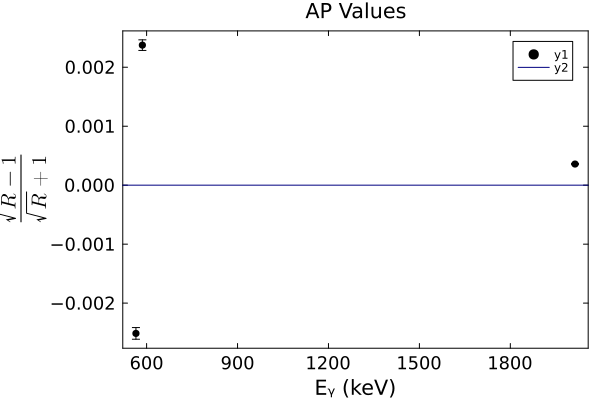

In [18]:
using Plots

# your plot command
p = scatter(kliterature, AP, yerr=error_AP,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{\sqrt{R} - 1}{\sqrt{R} + 1}",
    title = "AP Values"
)

# optional horizontal line
hline!(p, [0])

In [11]:
# Saving plot to directory
#savefig(p, "ap_plot.pdf")
savefig(p, "/Users/josie/Desktop/Research/Madurga/plots/ap_plot.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/ap_plot.pdf"

## Efficiency Corrected

Used new error propogation that made errors much smaller, check if equation used is correct. Calculates as so:  $\sigma_{AP} = AP \times \sqrt{2 \times (\frac{\sigma_R}{R})^2}$

In [12]:
N_1 = N_1_plus .* 0.75
N_1_σ = N_1_σplus .* 0.75
N_1_m = N_1_minus .* 0.75
N_1_σm = N_1_σminus .* 0.75


R = R_fun(N_0_plus, N_1, N_0_minus, N_1_m)
println(R)

error_r = err(N_0_plus, N_1, N_0_minus, N_1_m, N_0_σplus, N_1_σ, N_0_σminus, N_1_σm)
println(error_r)

[0.9899963090942512, 1.009543916044334, 1.0014346681068445]
[0.027578271772194997, 0.026925331108085617, 0.02021125625605141]


In [ ]:
AP = (((R) .^ (0.5)) .- 1) ./ (((R) .^ (0.5)) .+ 1)

err_AP(AP, V, σV) = AP .* ((2 .* ((σV ./ V) .^ 2)) .^ 0.5)

error_AP = err_AP(AP, R, error_r)

println(AP)
println(error_AP)

[-0.0025135107187665086, 0.0023746606845475348, 0.0003584099731058751]
[-9.902143392488597e-5, 8.956790096997444e-5, 1.0229767663434586e-5]


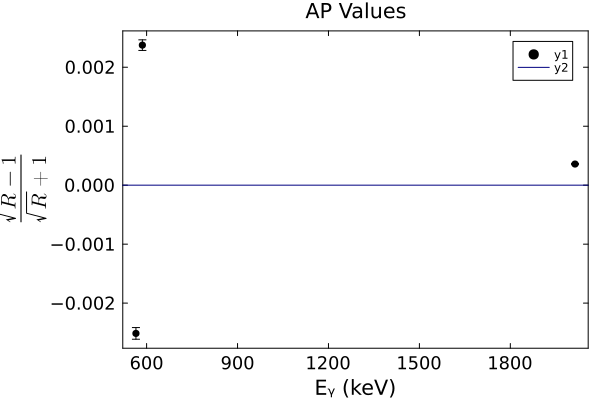

In [16]:
using Plots

# your plot command
p = scatter(kliterature, AP, yerr=error_AP,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{\sqrt{R} - 1}{\sqrt{R} + 1}",
    title = "AP Values"
)

# optional horizontal line
hline!(p, [0])

In [19]:
savefig(p, "/Users/josie/Desktop/Research/Madurga/plots/ap_plot_effcor.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/ap_plot_effcor.pdf"

# Assorted Asymmetry Calculations

## 6-26-25 Proposed Asymmetry

### T1_001

#### $$\frac{N_1}{N_2} - 1$$

In [115]:
asym_001_1 = (N_1_plus ./ N_2_plus) .- 1

asym_001_1_err = (((N_1_σplus .^ 2) .* ((1 ./ N_2_plus) .^ 2)) .+ ((N_2_σplus .^ 2) .* ((-N_1_plus ./ (N_2_plus .^ 2)) .^ 2))) .^ (0.5)

3-element Vector{Float64}:
 0.002613707573073145
 0.0017814490611171747
 0.0014705115012267455

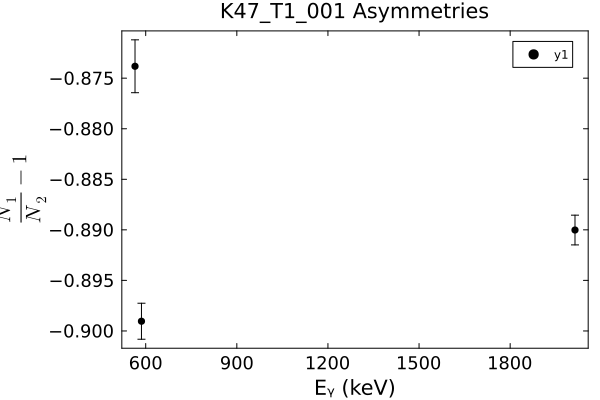

In [116]:
# Plotting this asymmetry
q = scatter(kliterature, asym_001_1, yerr=asym_001_1_err,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_1}{N_2} -1",
    title = "K47_T1_001 Asymmetries"
)

In [117]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_001_asym_N2.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_001_asym_N2.pdf"

#### $$\frac{N_1}{N_0} - 1$$

In [118]:
asym_001_2 = (N_1_plus ./ N_0_plus) .- 1

asym_001_2_err = (((N_1_σplus .^ 2) .* ((1 ./ N_0_plus) .^ 2)) .+ ((N_0_σplus .^ 2) .* ((-N_1_plus ./ (N_0_plus .^ 2)) .^ 2))) .^ (0.5)

3-element Vector{Float64}:
 0.002795894024892647
 0.0025771395999750176
 0.002075733023504031

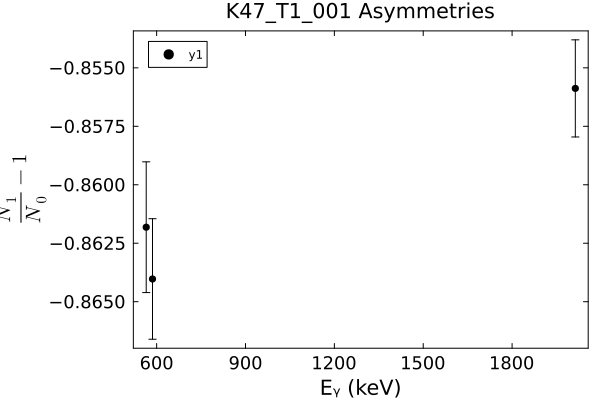

In [119]:
# Plotting this asymmetry
q = scatter(kliterature, asym_001_2, yerr=asym_001_2_err,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_1}{N_0} -1",
    title = "K47_T1_001 Asymmetries"
)

In [120]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_001_asym_N0.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_001_asym_N0.pdf"

### T1_002

#### $$\frac{N_1}{N_2} - 1$$

In [121]:
asym_002_1 = (N_1_minus ./ N_2_minus) .- 1

asym_002_1_err = (((N_1_σminus .^ 2) .* ((1 ./ N_2_minus) .^ 2)) .+ ((N_2_σminus .^ 2) .* ((-N_1_minus ./ (N_2_minus .^ 2)) .^ 2))) .^ (0.5)

3-element Vector{Float64}:
 0.002431818508470183
 0.0018085831648100518
 0.0015727350912596674

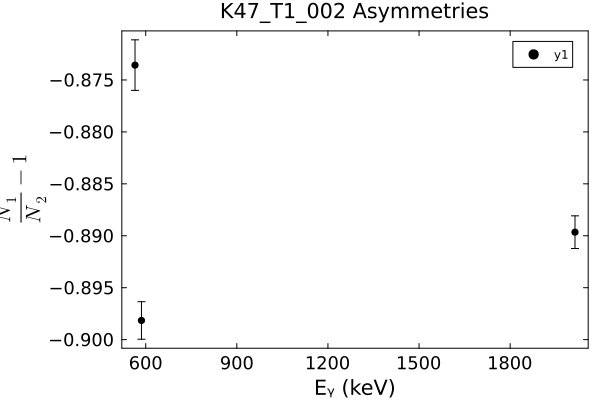

In [122]:
# Plotting this asymmetry
q = scatter(kliterature, asym_002_1, yerr=asym_002_1_err,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_1}{N_2} -1",
    title = "K47_T1_002 Asymmetries"
)

In [123]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_002_asym_N2.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_002_asym_N2.pdf"

#### $$\frac{N_1}{N_0} - 1$$

In [124]:
asym_002_2 = (N_1_minus ./ N_0_minus) .- 1

asym_002_2_err = (((N_1_σminus .^ 2) .* ((1 ./ N_0_minus) .^ 2)) .+ ((N_0_σminus .^ 2) .* ((-N_1_minus ./ (N_0_minus .^ 2)) .^ 2))) .^ (0.5)

3-element Vector{Float64}:
 0.0026195041318151494
 0.002575781687690093
 0.0020405414951080673

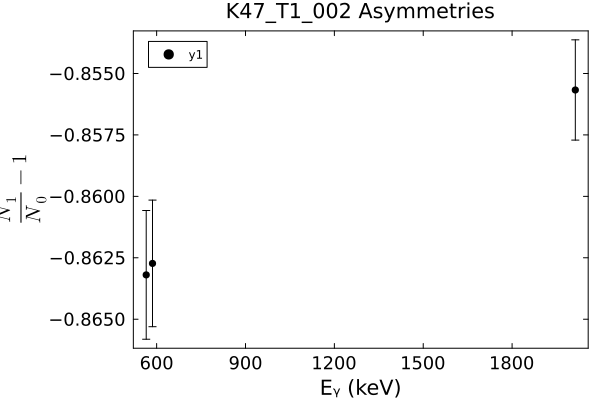

In [125]:
# Plotting this asymmetry
q = scatter(kliterature, asym_002_2, yerr=asym_002_2_err,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_1}{N_0} -1",
    title = "K47_T1_002 Asymmetries"
)

In [126]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_002_asym_N0.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_002_asym_N0.pdf"

## Ratios $\frac{N_0}{N_1}$ & $\frac{N_2}{N_1}$

### Raw

#### T1_001

##### $$\frac{N_0}{N_1}$$

In [ ]:
ratio = N_0_plus ./ N_1_plus
# println(ratio)

err_rat = (((N_0_σplus .^ 2) .* ((1 ./ N_1_plus) .^ 2)) .+ ((N_1_σplus .^ 2) .* ((-N_0_plus ./ (N_1_plus .^2)) .^ 2))) .^ (0.5)
# println(err_rat)

[7.236619655355268, 7.354430293371797, 6.938590352946236]
[0.14641723487062952, 0.1393914116444293, 0.09993416558847698]


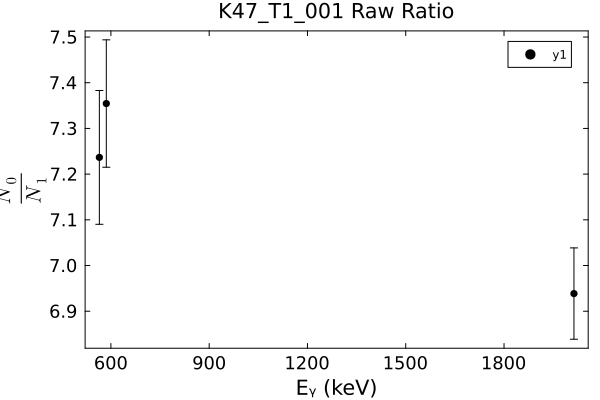

In [133]:
q = scatter(kliterature, ratio, yerr=err_rat,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_0}{N_1}",
    title = "K47_T1_001 Raw Ratio"
)

In [134]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_001_rawrat_N0.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_001_rawrat_N0.pdf"

##### $$\frac{N_2}{N_1}$$

In [135]:
ratio = N_2_plus ./ N_1_plus
# println(ratio)

err_rat = (((N_2_σplus .^ 2) .* ((1 ./ N_1_plus) .^ 2)) .+ ((N_1_σplus .^ 2) .* ((-N_2_plus ./ (N_1_plus .^2)) .^ 2))) .^ (0.5)
# println(err_rat)

3-element Vector{Float64}:
 0.16416460741808334
 0.17477616124542636
 0.12156746779936084

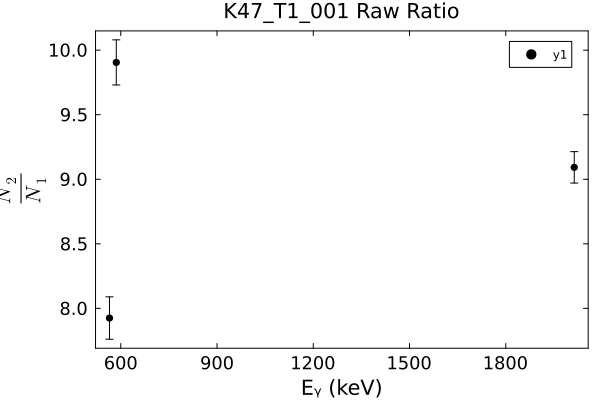

In [136]:
q = scatter(kliterature, ratio, yerr=err_rat,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_2}{N_1}",
    title = "K47_T1_001 Raw Ratio"
)

In [137]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_001_rawrat_N2.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_001_rawrat_N2.pdf"

#### T1_002

##### $$\frac{N_0}{N_1}$$

In [138]:
ratio = N_0_minus ./ N_1_minus
# println(ratio)

err_rat = (((N_0_σminus .^ 2) .* ((1 ./ N_1_minus) .^ 2)) .+ ((N_1_σminus .^ 2) .* ((-N_0_minus ./ (N_1_minus .^2)) .^ 2))) .^ (0.5)
# println(err_rat)

3-element Vector{Float64}:
 0.13996628373781075
 0.13669627859119346
 0.09795862551826497

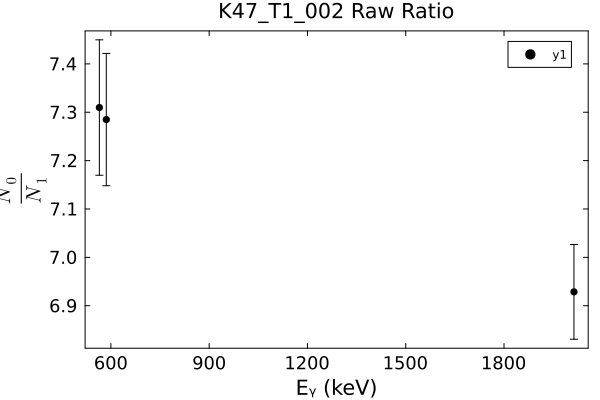

In [140]:
q = scatter(kliterature, ratio, yerr=err_rat,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_0}{N_1}",
    title = "K47_T1_002 Raw Ratio"
)

In [141]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_002_rawrat_N0.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_002_rawrat_N0.pdf"

##### $$\frac{N_2}{N_1}$$

In [142]:
ratio = N_2_minus ./ N_1_minus
# println(ratio)

err_rat = (((N_2_σminus .^ 2) .* ((1 ./ N_1_minus) .^ 2)) .+ ((N_1_σminus .^ 2) .* ((-N_2_minus ./ (N_1_minus .^2)) .^ 2))) .^ (0.5)
# println(err_rat)

3-element Vector{Float64}:
 0.15214224576108312
 0.17436278495816734
 0.12916658072006437

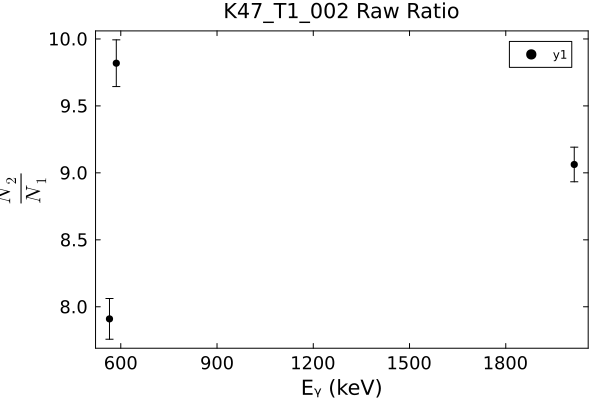

In [143]:
q = scatter(kliterature, ratio, yerr=err_rat,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_2}{N_1}",
    title = "K47_T1_002 Raw Ratio"
)

In [144]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_002_rawrat_N2.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_002_rawrat_N2.pdf"

### Efficiency corrected

#### T1_001

In [147]:
N_0 = N_0_plus
N_1 = N_1_plus .* 0.75
N_2 = N_2_plus .* 0.75

N_0_σ = N_0_σplus
N_1_σ = N_1_σplus .* 0.75
N_2_σ = N_2_σplus .* 0.75

3-element Vector{Float64}:
  4641.158955049802
 19896.93804145365
 10687.145033514043

##### $$\frac{N_0}{N_1}$$

In [149]:
ratio = N_0 ./ N_1
# println(ratio)

err_rat = (((N_0_σ .^ 2) .* ((1 ./ N_1) .^ 2)) .+ ((N_1_σ .^ 2) .* ((-N_0 ./ (N_1 .^2)) .^ 2))) .^ (0.5)
# println(err_rat)

3-element Vector{Float64}:
 0.18662171165041436
 0.18226170478825793
 0.13061150069101998

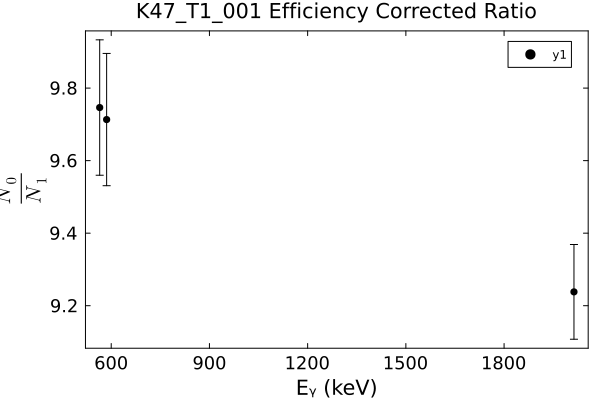

In [151]:
q = scatter(kliterature, ratio, yerr=err_rat,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_0}{N_1}",
    title = "K47_T1_001 Efficiency Corrected Ratio")

In [152]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_001_efcor_N0.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_001_efcor_N0.pdf"

##### $$\frac{N_2}{N_1}$$

In [153]:
ratio = N_2 ./ N_1
# println(ratio)

err_rat = (((N_2_σ .^ 2) .* ((1 ./ N_1) .^ 2)) .+ ((N_1_σ .^ 2) .* ((-N_2 ./ (N_1 .^2)) .^ 2))) .^ (0.5)
# println(err_rat)

3-element Vector{Float64}:
 0.1521422457610831
 0.17436278495816734
 0.1291665807200644

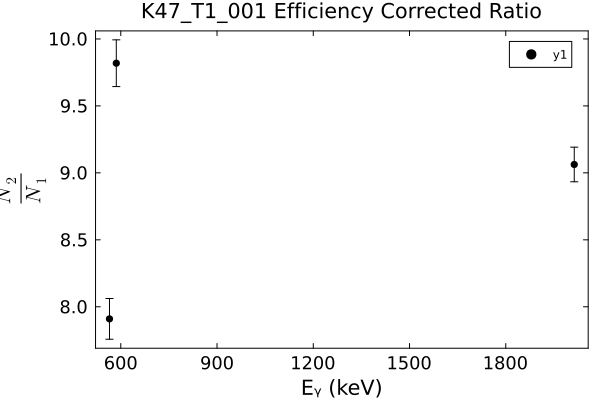

In [154]:
q = scatter(kliterature, ratio, yerr=err_rat,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_2}{N_1}",
    title = "K47_T1_001 Efficiency Corrected Ratio")

In [155]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_001_efcor_N2.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_001_efcor_N2.pdf"

#### T1_002

In [148]:
N_0 = N_0_minus
N_1 = N_1_minus .* 0.75
N_2 = N_2_minus .* 0.75

N_0_σ = N_0_σminus
N_1_σ = N_1_σminus .* 0.75
N_2_σ = N_2_σminus .* 0.75

3-element Vector{Float64}:
 13276.082474372528
 72905.13846974021
 39219.54110755552

##### $$\frac{N_0}{N_1}$$

In [156]:
ratio = N_0 ./ N_1
# println(ratio)

err_rat = (((N_0_σ .^ 2) .* ((1 ./ N_1) .^ 2)) .+ ((N_1_σ .^ 2) .* ((-N_0 ./ (N_1 .^2)) .^ 2))) .^ (0.5)

3-element Vector{Float64}:
 0.18662171165041436
 0.18226170478825793
 0.13061150069101998

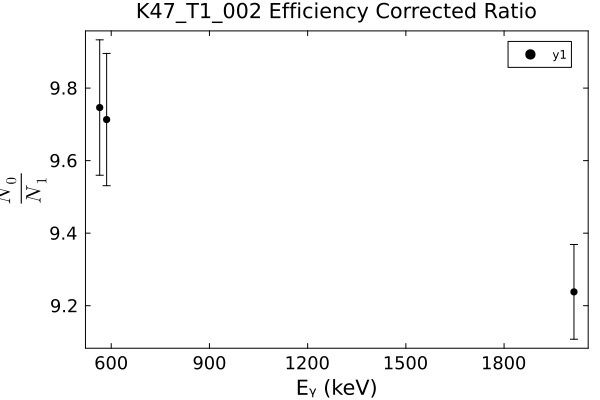

In [157]:
q = scatter(kliterature, ratio, yerr=err_rat,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_0}{N_1}",
    title = "K47_T1_002 Efficiency Corrected Ratio")

In [158]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_002_efcor_N0.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_002_efcor_N0.pdf"

##### $$\frac{N_2}{N_1}$$

In [159]:
ratio = N_2 ./ N_1
# println(ratio)

err_rat = (((N_2_σ .^ 2) .* ((1 ./ N_1) .^ 2)) .+ ((N_1_σ .^ 2) .* ((-N_2 ./ (N_1 .^2)) .^ 2))) .^ (0.5)
# println(err_rat)

3-element Vector{Float64}:
 0.1521422457610831
 0.17436278495816734
 0.1291665807200644

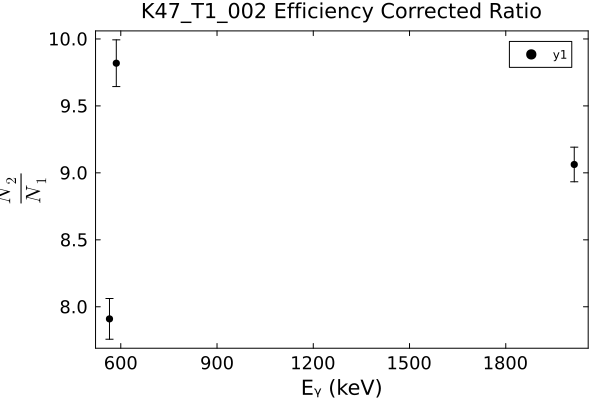

In [160]:
q = scatter(kliterature, ratio, yerr=err_rat,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_2}{N_1}",
    title = "K47_T1_002 Efficiency Corrected Ratio")

In [161]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_002_efcor_N2.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_002_efcor_N2.pdf"